In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler

In [2]:
# Path where CSV files are stored
path = 'data/ecg_data_parts/'

# Load all CSV files in the directory
csv_files = glob.glob(path + "*.csv")


In [3]:
# Initialize an empty list to store dataframes
dataframes = []

# Iterate over each file
for file in csv_files:
    df = pd.read_csv(file)
    
    # Check if the columns match the first file (if applicable)
    if dataframes:
        if not df.columns.equals(dataframes[0].columns):
            print(f"Column mismatch in file {file}. Skipping.")
            continue
    
    # Add DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single one
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the combined_data DataFrame
combined_data

,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_Power,Segment_1_HF_Power,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_Power,Segment_2_HF_Power,...,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_Power,Segment_287_HF_Power,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_Power,Segment_288_HF_Power,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,157.0,7248.0,11944.0,0.61,89.0,168.0,5169.0,13167.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,217.0,8888.0,8575.0,1.04,93.0,NaN,14931.0,25134.0,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.0,263.0,5804.0,12664.0,0.46,64.0,124.0,1968.0,3626.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,32.0,121.0,390.0,0.31,45.0,89.0,918.0,4984.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,211.0,10698.0,18715.0,0.57,64.0,204.0,7655.0,15103.0,0.51
603,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.0,10.0,0.0,2.0,0.00,117.0,27.0,109.0,198.0,0.55
605,1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,24.0,129.0,46.0,2.80,49.0,80.0,61.0,116.0,0.53


In [4]:
# Drop columns with "LF_Power" or "HF_Power" in their names
filtered_data = combined_data.drop(columns=[col for col in combined_data.columns if "LF_Power" in col or "HF_Power" in col])

# Display the first few rows to verify the changes
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,NaN,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


In [5]:
# Create separate DataFrames for each feature type
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hrv_sdnn_cols = [col for col in filtered_data.columns if "HRV_SDNN" in col]
lf_hf_ratio_cols = [col for col in filtered_data.columns if "LF_HF_Ratio" in col]

In [6]:
# For LF_HF_Ratio, replace values above 10 or below 0 with NaN
for col in lf_hf_ratio_cols:
    filtered_data[col] = filtered_data[col].map(lambda x: x if 0 <= x <= 10 else np.nan)

# For Mean_HR, replace values below 30 or above 190 with NaN
for col in mean_hr_cols:
    filtered_data[col] = filtered_data[col].map(lambda x: x if 30 <= x <= 190 else np.nan)

# For HRV_SDNN, replace values above 300 or below 5 with NaN
for col in hrv_sdnn_cols:
    filtered_data[col] = filtered_data[col].map(lambda x: x if 5 <= x <= 300 else np.nan)

# Display the first few rows to verify the changes
filtered_data.head()

,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,NaN,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


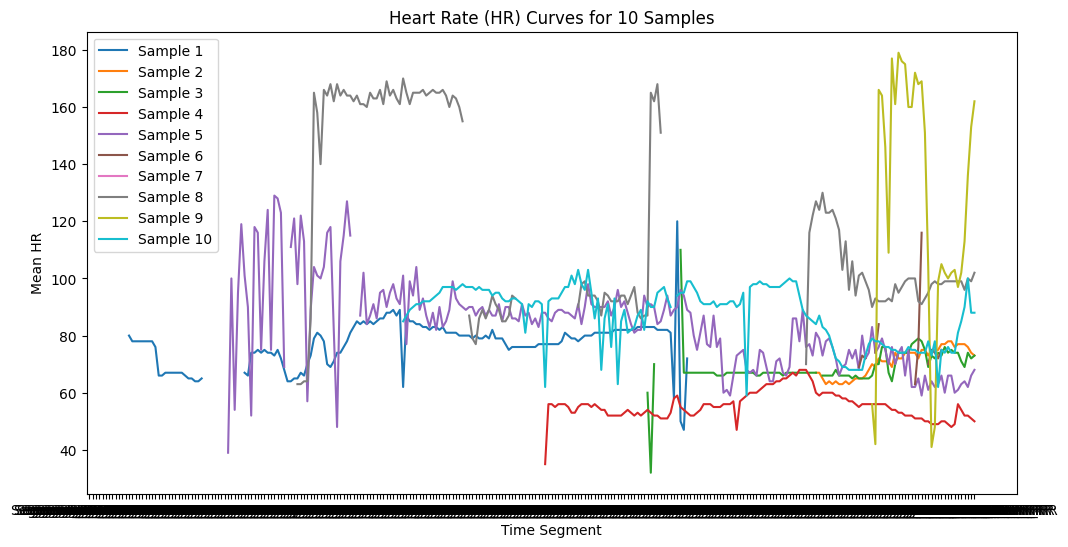

In [7]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[mean_hr_cols].iloc[20:30].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


In [8]:
# Loop over each feature type column group
for col_group in [mean_hr_cols, hrv_sdnn_cols, lf_hf_ratio_cols]:
    # For each row in the feature group
    for index, row in filtered_data[col_group].iterrows():
        # Check for gaps followed by valid data
        is_nan = row.isna()
        segments_start = is_nan.astype(int).diff().fillna(0).eq(-1)  # Find where NaNs end and valid data starts

        # For each start of a segment after NaNs
        for start in segments_start[segments_start].index:
            # Get the first 5 valid values in this segment
            valid_values = row[start:].dropna().iloc[:5]
            if len(valid_values) == 5:
                mean_next_5 = valid_values.mean()

                # Replace the first two valid values in this segment with the mean of the next 5 values
                for idx in row[start:].dropna().index[:2]:  # First two valid indices in the segment
                    filtered_data.at[index, idx] = mean_next_5

# Display the first few rows to verify the result
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,NaN,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


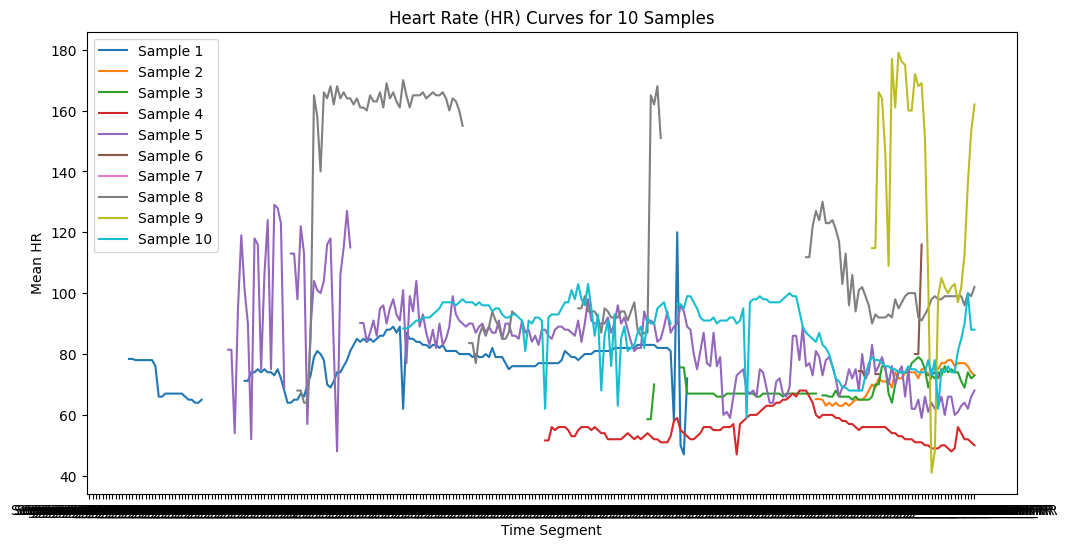

In [9]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[mean_hr_cols].iloc[20:30].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


In [10]:


# Apply interpolation to each feature type individually
filtered_data[mean_hr_cols] = filtered_data[mean_hr_cols].interpolate(method="linear", axis=1)
filtered_data[hrv_sdnn_cols] = filtered_data[hrv_sdnn_cols].interpolate(method="linear", axis=1)
filtered_data[lf_hf_ratio_cols] = filtered_data[lf_hf_ratio_cols].interpolate(method="linear", axis=1)

# Verify the result
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,217.0,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.39,86.0,112.0,0.39,86.0,112.0,0.39,86.0,112.0,0.39
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


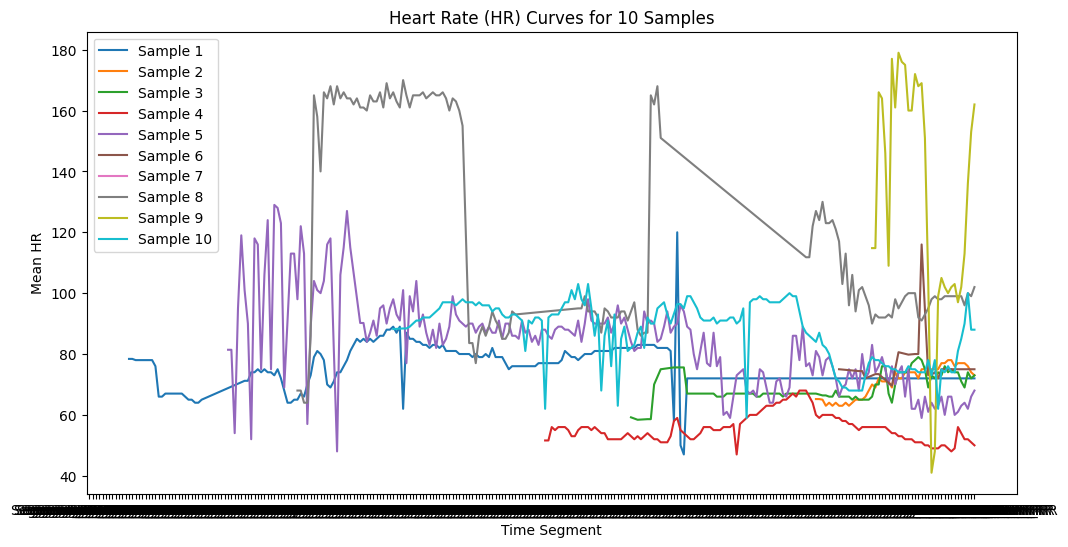

In [11]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[mean_hr_cols].iloc[20:30].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


In [12]:
# Loop over each feature type column group
for col_group in [mean_hr_cols, hrv_sdnn_cols, lf_hf_ratio_cols]:
    # For each row in the feature group
    for index, row in filtered_data[col_group].iterrows():
        # Get the first 5 valid (non-NaN) values in the row
        first_5_values = row.dropna().iloc[:5]  # Select the first 5 measured values
        if len(first_5_values) == 5:  # Ensure we have 5 values to calculate the mean
            mean_first_5 = first_5_values.mean()
            
            # Identify the indices of the first two valid (non-NaN) values
            first_two_valid_indices = row.dropna().index[:2]
            
            # Replace these first two valid values with the mean
            for idx in first_two_valid_indices:
                filtered_data.at[index, idx] = mean_first_5

# Display the first few rows to verify the result
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,217.0,0.59
2,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.39,86.0,112.0,0.39,86.0,112.0,0.39,86.0,112.0,0.39
3,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


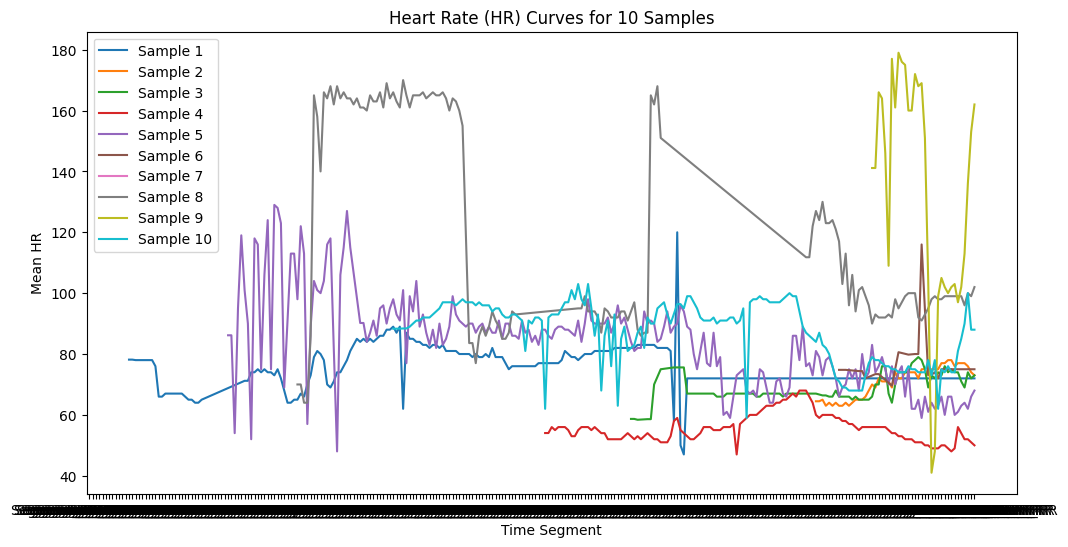

In [13]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[mean_hr_cols].iloc[20:30].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


In [14]:
# Perform backfill for each feature type column group
for col_group in [mean_hr_cols, hrv_sdnn_cols, lf_hf_ratio_cols]:
    # Backfill each row in the column group
    filtered_data[col_group] = filtered_data[col_group].bfill(axis=1)

# Display the first few rows to verify the result
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,99.12,106.90,0.5680,99.12,106.90,0.5680,99.12,106.90,0.5680,...,0.47,84.0,174.0,0.43,88.0,157.0,0.61,89.0,168.0,0.39
1,286,51.64,247.46,0.3084,51.64,247.46,0.3084,51.64,247.46,0.3084,...,0.34,59.0,197.0,0.61,62.0,217.0,1.04,93.0,217.0,0.59
2,296,101.48,49.52,0.4684,101.48,49.52,0.4684,101.48,49.52,0.4684,...,0.39,86.0,112.0,0.39,86.0,112.0,0.39,86.0,112.0,0.39
3,299,60.60,143.76,0.3832,60.60,143.76,0.3832,60.60,143.76,0.3832,...,0.59,65.0,106.0,0.83,72.0,263.0,0.46,64.0,124.0,0.54
4,303,159.36,156.40,0.4888,159.36,156.40,0.4888,159.36,156.40,0.4888,...,0.33,46.0,155.0,0.22,45.0,32.0,0.31,45.0,89.0,0.18


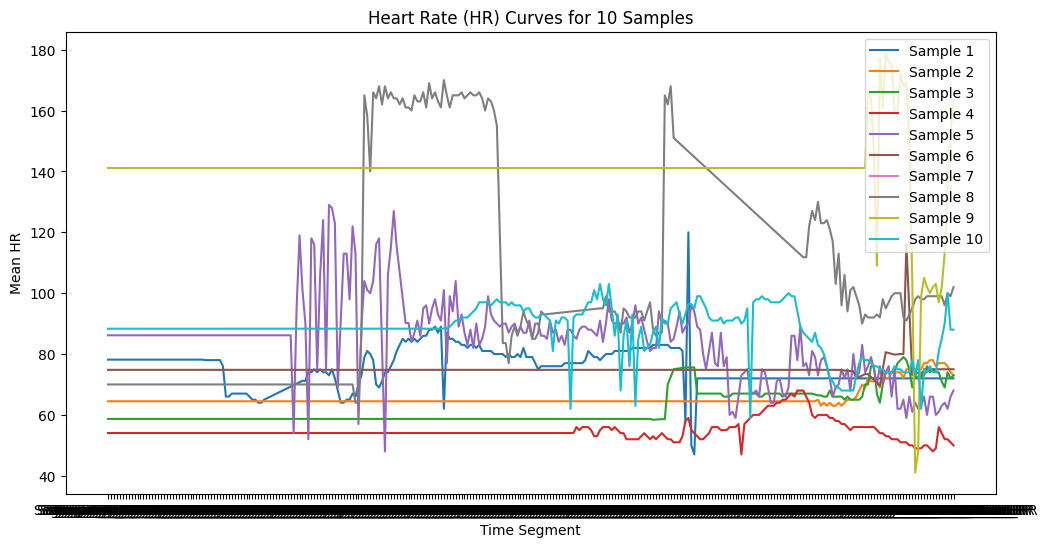

In [15]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[mean_hr_cols].iloc[20:30].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


In [16]:
# Set the window size for the rolling average
window_size = 3  # Adjust this value for more or less smoothing

# Apply rolling average smoothing to each feature type column group
for col_group in [mean_hr_cols, hrv_sdnn_cols, lf_hf_ratio_cols]:
    # Transpose, apply rolling average along rows, then transpose back
    filtered_data[col_group] = (
        filtered_data[col_group].T.rolling(window=window_size, min_periods=1).mean().T
    )

# Display the first few rows to verify the result
filtered_data.head()


,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,99.12,106.90,0.5680,99.12,106.90,0.5680,99.12,106.90,0.5680,...,0.403333,82.333333,181.333333,0.413333,84.333333,171.000000,0.503333,87.000000,166.333333,0.476667
1,286,51.64,247.46,0.3084,51.64,247.46,0.3084,51.64,247.46,0.3084,...,0.376667,58.000000,194.000000,0.443333,59.000000,195.333333,0.663333,71.333333,210.333333,0.746667
2,296,101.48,49.52,0.4684,101.48,49.52,0.4684,101.48,49.52,0.4684,...,0.390000,86.000000,112.000000,0.390000,86.000000,112.000000,0.390000,86.000000,112.000000,0.390000
3,299,60.60,143.76,0.3832,60.60,143.76,0.3832,60.60,143.76,0.3832,...,0.643333,71.666667,149.333333,0.740000,67.000000,181.333333,0.626667,67.000000,164.333333,0.610000
4,303,159.36,156.40,0.4888,159.36,156.40,0.4888,159.36,156.40,0.4888,...,0.306667,47.666667,178.066667,0.220000,46.000000,128.333333,0.286667,45.333333,92.000000,0.236667


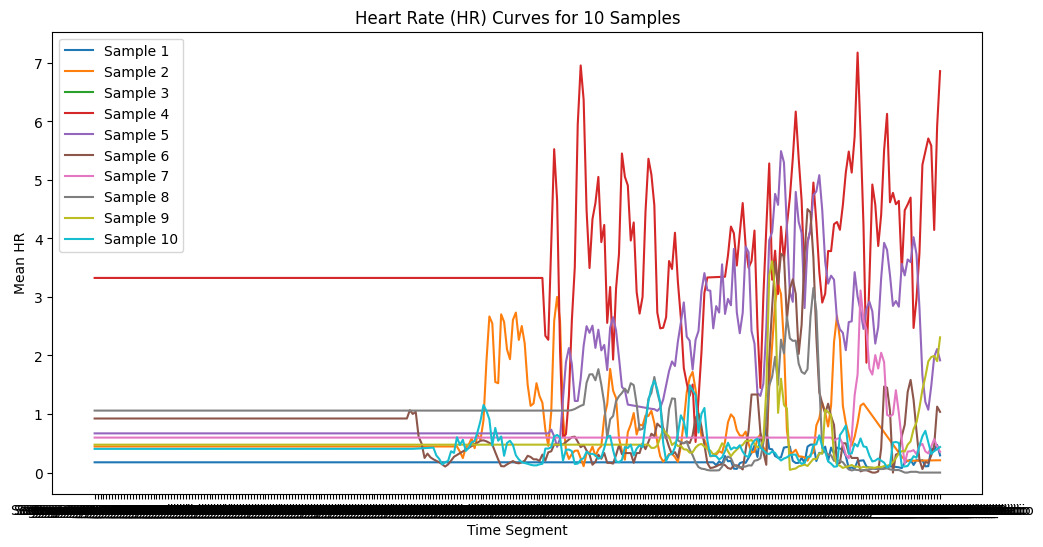

In [17]:
import matplotlib.pyplot as plt

# Select the first 10 samples and the columns related to Mean_HR
mean_hr_cols = [col for col in filtered_data.columns if "Mean_HR" in col]
hr_data = filtered_data[lf_hf_ratio_cols].iloc[70:80].T  # Transpose for plotting

# Plot the HR curves
plt.figure(figsize=(12, 6))
for i, (sample_id, row) in enumerate(hr_data.items()):
    plt.plot(row, label=f'Sample {i+1}')

# Add plot details
plt.title("Heart Rate (HR) Curves for 10 Samples")
plt.xlabel("Time Segment")
plt.ylabel("Mean HR")
plt.legend()
plt.show()


### 2.1. Preprocess the ecg_data


#### Check the datatypes of the loaded data
combined_data.dtypes

In [18]:
final_df = filtered_data.copy()

In [19]:
# Initialize the scaler and standardize each group separately
scaler_mean_hr = StandardScaler()
scaler_hrv_sdnn = StandardScaler()
scaler_lf_hf_ratio = StandardScaler()

In [20]:
# Apply scaling and replace values in the DataFrame
final_df[mean_hr_cols] = scaler_mean_hr.fit_transform(final_df[mean_hr_cols])
final_df[hrv_sdnn_cols] = scaler_hrv_sdnn.fit_transform(final_df[hrv_sdnn_cols])
final_df[lf_hf_ratio_cols] = scaler_lf_hf_ratio.fit_transform(final_df[lf_hf_ratio_cols])


In [21]:
# Step 1: Fill NaNs with zeros
final_df = final_df.fillna(0)


In [22]:
final_df

,Patient_ID,Segment_1_Mean_HR,Segment_1_HRV_SDNN,Segment_1_LF_HF_Ratio,Segment_2_Mean_HR,Segment_2_HRV_SDNN,Segment_2_LF_HF_Ratio,Segment_3_Mean_HR,Segment_3_HRV_SDNN,Segment_3_LF_HF_Ratio,...,Segment_285_LF_HF_Ratio,Segment_286_Mean_HR,Segment_286_HRV_SDNN,Segment_286_LF_HF_Ratio,Segment_287_Mean_HR,Segment_287_HRV_SDNN,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_HF_Ratio
0,284,0.767585,-0.049949,-0.143019,0.767585,-0.049949,-0.143019,0.767585,-0.049949,-0.143019,...,-0.308781,0.113971,0.998257,-0.326269,0.180948,0.865033,-0.265086,0.268891,0.804852,-0.292048
1,286,-1.123594,1.956230,-0.447932,-1.123594,1.956230,-0.447932,-1.123594,1.956230,-0.447932,...,-0.334626,-0.750374,1.160116,-0.298228,-0.712291,1.175686,-0.121390,-0.286107,1.369312,-0.051627
2,296,0.861586,-0.868920,-0.260004,0.861586,-0.868920,-0.260004,0.861586,-0.868920,-0.260004,...,-0.321703,0.244215,0.112291,-0.348079,0.239714,0.111805,-0.366870,0.233466,0.107830,-0.369220
3,299,-0.766708,0.476145,-0.360076,-0.766708,0.476145,-0.360076,-0.766708,0.476145,-0.360076,...,-0.076170,-0.264920,0.589350,-0.020928,-0.430215,0.996954,-0.154320,-0.439618,0.779195,-0.173321
4,303,3.167009,0.656553,-0.236044,3.167009,0.656553,-0.236044,3.167009,0.656553,-0.236044,...,-0.402471,-1.117424,0.956514,-0.506981,-1.170663,0.320325,-0.459674,-1.207170,-0.148743,-0.505755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,-0.307854,1.310245,-0.503841,-0.307854,1.310245,-0.503841,-0.307854,1.310245,-0.503841,...,-0.379856,-0.537248,1.343272,-0.413510,-0.559500,1.303352,-0.390820,-0.569511,1.292340,-0.312825
603,1017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
604,1018,1.400102,-1.290823,-0.735462,1.400102,-1.290823,-0.735462,1.400102,-1.290823,-0.735462,...,-0.551083,1.309845,-1.163414,-0.591106,1.297497,-1.158470,-0.618339,1.308038,-1.117305,-0.553246
605,1019,-1.167409,0.107337,-0.168859,-1.167409,0.107337,-0.168859,-1.167409,0.107337,-0.168859,...,0.473049,-1.070063,0.230704,0.384116,-1.064885,-0.015861,0.405496,-1.077276,-0.088876,0.417342


In [23]:
# Save the concatenated DataFrame to a new CSV file
output_path = 'data/ecg_data.csv'
final_df.to_csv(output_path, index=False)
